#  Определение стомости автомобилей для сервиса "Не бит не крашен"

**Описание исследования**

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 
Необходимо построить модель, которая умеет её определять. В нашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.
Критерии, которые отмечены заказчиком как важные:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

______

**Цель исследования**

Привлечь новых клиентов к сервису по продаже автомобилей с пробегом, где они могли бы узнать рыночную стоимость своего автомобиля

______

**Задачи исследования**

Подобрать наиболее подходящую модель, которая будет отвечать требованиям качества предсказания, времени обучения и предсказания модели.

______

**Исходные данные**

В нашем распоряжении данные о технических характеристиках, комплектации и цены на другие автомобили. В данных присутвуют следующие признаки:

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевым признаком является цена `Price`, которую мы и будем предсказывать.

______

**План выполнения исследования**

Для выполнения поставленной цели и задачи предлагается следующий план действий:

1. Подготовка данных к анализу, включающая в себя:

   - выгрузка необходимых библиотек;
   - изучение данных;
   - предобработка данных (работа с пропусками, аномалиями, дубликатами в случае необходимости)
   
2. Подготовка данных к обучению моделей, включающая в себя:

   - разделение данных на необходимые выборки;
   - кодирование категориальных признаков;
   - стандартизация количественных признаков
   
3. Обучение выбранных моделей:

   - LinearRegression;
   - CatBoostRegressor;
   - LGBMRegressor
   Здесь же проведение оценки качества моделей (оценивается по значению RMSE), а также проведение оценки времени, затрачиваемого на обучение и предсказание.

4. Анализ исследуемых моделей и проверка на тестовой выборке

5. Предоставление итоговых выводов.





## Подготовка данных

### Выгрузка библиотек и датафрейма

In [3]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/81.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [4]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.3 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.3 MB/s eta 0:00:01
   --------------- -------------------

In [2]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b4311f/catboost-1.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/101.1 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.2/101.1 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.3/101.1 MB 1.8 MB/s eta 0:00:58
   ---------------------------------------- 0.3/101.1 MB 1.8 MB/s eta 0:00:58
   ---------------------------------------- 0.3/101.1 MB 1.0 MB/s eta 0:01:41
   ---------------------------------------- 0.3/1

In [69]:
import pandas as pd

import numpy as np

import lightgbm as lgb

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from time import time

In [2]:
import category_encoders as ce

encoder = ce.MEstimateEncoder()

In [3]:
data = pd.read_csv('C:/Users/kseni/OneDrive/Desktop/практика/датасеты/autos.csv')

### Изучение данных

Напишем функцию для выгрузки и анализа данных


In [4]:
def check_data(df):
    display(df.head())
    print()
    display(f'Размеры датафрейма: {df.shape}')
    print()
    display('Количество пропусков:', df.isna().sum())
    print()
    display('Количество явных дубликатов', df.duplicated().sum())
    print()
    display(df.describe())
    print()
    display(df.info())

In [5]:
check_data(data)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


'Размеры датафрейма: (354369, 16)'

'Количество пропусков:'

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

'Количество явных дубликатов'

4

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object

None

In [6]:
data['DateCreated'].sort_values(ascending=True)

61207     2014-03-10 00:00:00
4001      2015-03-20 00:00:00
342275    2015-06-18 00:00:00
86601     2015-08-07 00:00:00
175103    2015-08-10 00:00:00
                 ...         
134418    2016-04-07 00:00:00
176987    2016-04-07 00:00:00
206303    2016-04-07 00:00:00
309336    2016-04-07 00:00:00
305430    2016-04-07 00:00:00
Name: DateCreated, Length: 354369, dtype: object

На вход получены данные до 2016 года о технических характеристиках, комплектации и ценах других автомобилей . 
Размерность датафрейма (354369, 16)

В качестве признаков выступают следующие столбцы:

- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевым признаком является `Price` - цена (в евро)

По результатам обзора данных сформулируем план на предобработку данных.

1. Наименование столбцов не соответсвует "snake регистру", приведем в соответствие;
2. В данных присутствуют столбцы, такие как `DateCrawled`, `RegistrationMonth`, `DateCreated`, `NumberOfPictures`, `PostalCode`, `LastSeen`, не влияющие на целевой признак, а именно цену автомобиля. Удалим эти столбцы из датафрейма;
3. В датафрейме обнаружено 4 явных дубликата, удалим их;
4. В столбцах с данными влияющими на целевой признак присутсвуют пропуски:

- `VehicleType` - обнаружено 37490 пропусков;
- `Gearbox` - обнаружено 19833 пропуска;
- `Model` - обнаружено 19705 пропусков;
- `FuelType` - обнаружено 32895 пропусков;
- `Repaired` - обнаружено 71154 пропуска;

Заполним из логически подходящими значениями;

5. Так же в колонке `RegistrationYear` обнаружены аномальные значения, например 1000 год, или 9999 год. В колонке `Power` обнаружено аномальное значение 20000 лошадиных сил. Проверим данные на выбросы и примем решение по их предобработке;
6. В целевом признаке `Price` присутствуют нулевые значения.
7. В столбце `Gearbox` и `Repaired` категориальные признаки, которые для удобства нужно заменить на 0 и 1.


### Предобработка данных

#### Удаление признаков, не влиящих на целевой

In [7]:
data = data.drop(columns=['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'])

In [8]:
data.shape

(354369, 10)

#### Приведение наименований столбцов к единому стилю

In [9]:
data = data.rename(columns={'VehicleType' : 'vehicle_type',
                           'RegistrationYear' : 'registration_year',
                           'Gearbox' : 'gearbox',
                           'Power' : 'power',
                           'Model' : 'model',
                           'Kilometer' : 'kilometer',
                           'FuelType' : 'fuel_type',
                           'Brand' : 'brand',
                           'Repaired' : 'repaired',
                           'Price' : 'price'})

In [10]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


#### Удалим явные дубликаты

In [11]:
data = data.drop_duplicates()
data.duplicated().sum()

0

#### Посмотрим на пропуски в признаках и целевом признаке

Признак **vehicle_type**

Так как в колонке `vehicle_type` указаны категориальные признаки о типах кузова, заполнить их конкретными значениями не представляется возможным, поэтому заполним пропуски значением `unknown`

In [12]:
data['vehicle_type'] = data['vehicle_type'].fillna(value='unknown')
data['vehicle_type'].value_counts()

vehicle_type
sedan          78206
small          67548
wagon          56367
unknown        34559
bus            25830
convertible    18195
coupe          14690
suv            10776
other           3158
Name: count, dtype: int64

Признак **model**

Так как в колонке `model` указаны категориальные признаки моделях машин, заполнить их конкретными значениями не представляется возможным, поэтому заполним пропуски значением `unknown`

In [13]:
data['model'] = data['model'].fillna(value='unknown')
data['model'].value_counts()

model
golf                  23639
other                 22934
unknown               18361
3er                   16700
polo                  10494
                      ...  
kalina                    7
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        1
Name: count, Length: 251, dtype: int64

Признак **gearbox**

Восстановим тип коробки передач в колонке по данным из колонки `model`

In [14]:
data['gearbox'] = data['gearbox'].fillna(data
                                         .groupby('model')['gearbox']
                                         .transform(lambda x: x.value_counts().idxmax())
                                        )
data['gearbox'].value_counts()

gearbox
manual    248443
auto       60886
Name: count, dtype: int64

Здесь же заменим значения `manual` и `auto` на 1 и 0

In [15]:
data.loc[(data.gearbox == 'manual'), 'gearbox'] = 1
data.loc[(data.gearbox == 'auto'), 'gearbox'] = 0
data['gearbox'].value_counts()

gearbox
1    248443
0     60886
Name: count, dtype: int64

Признак **fuel_type**

Так как в колонке `fuel_type` указаны категориальные признаки с типом топлива, заполнить их конкретными значениями не представляется возможным, поэтому заполним пропуски значением `unknown`

In [16]:
data['fuel_type'] = data['fuel_type'].fillna(value='unknown')
data['fuel_type'].value_counts()

fuel_type
petrol      187848
gasoline     84794
unknown      30764
lpg           4888
cng            524
hybrid         222
other          200
electric        89
Name: count, dtype: int64

Признак **repaired**

In [17]:
data['repaired'].isna().sum()

64558

Так как в данных о некоторых автомобилях отсутствует информация была машина в ремонте или нет, заменим эти пропуски `no`

In [18]:
data['repaired'] = data['repaired'].fillna(value='no')
data['repaired'].value_counts()

repaired
no     275886
yes     33443
Name: count, dtype: int64

Здесь же заменим значения `yes` и `no` на 1 и 0

In [19]:
data.loc[(data.repaired == 'yes'), 'repaired'] = 1
data.loc[(data.repaired == 'no'), 'repaired'] = 0
data['repaired'].value_counts()

repaired
0    275886
1     33443
Name: count, dtype: int64

Признак **registration_year**

In [20]:
data.registration_year.value_counts()

registration_year
2000    20840
2005    19350
1999    18876
2001    17234
2006    17201
        ...  
6500        1
2290        1
1001        1
9450        1
3500        1
Name: count, Length: 151, dtype: int64

Посмотрим на данные в столбце `registration_year` на графике

In [21]:
years = data.pivot_table(index='registration_year', values='model', aggfunc='count')
years.columns = ['quantity']
years

,quantity
registration_year,
1000,35
1001,1
1039,1
1111,3
1200,1
...,...
9000,3
9229,1
9450,1


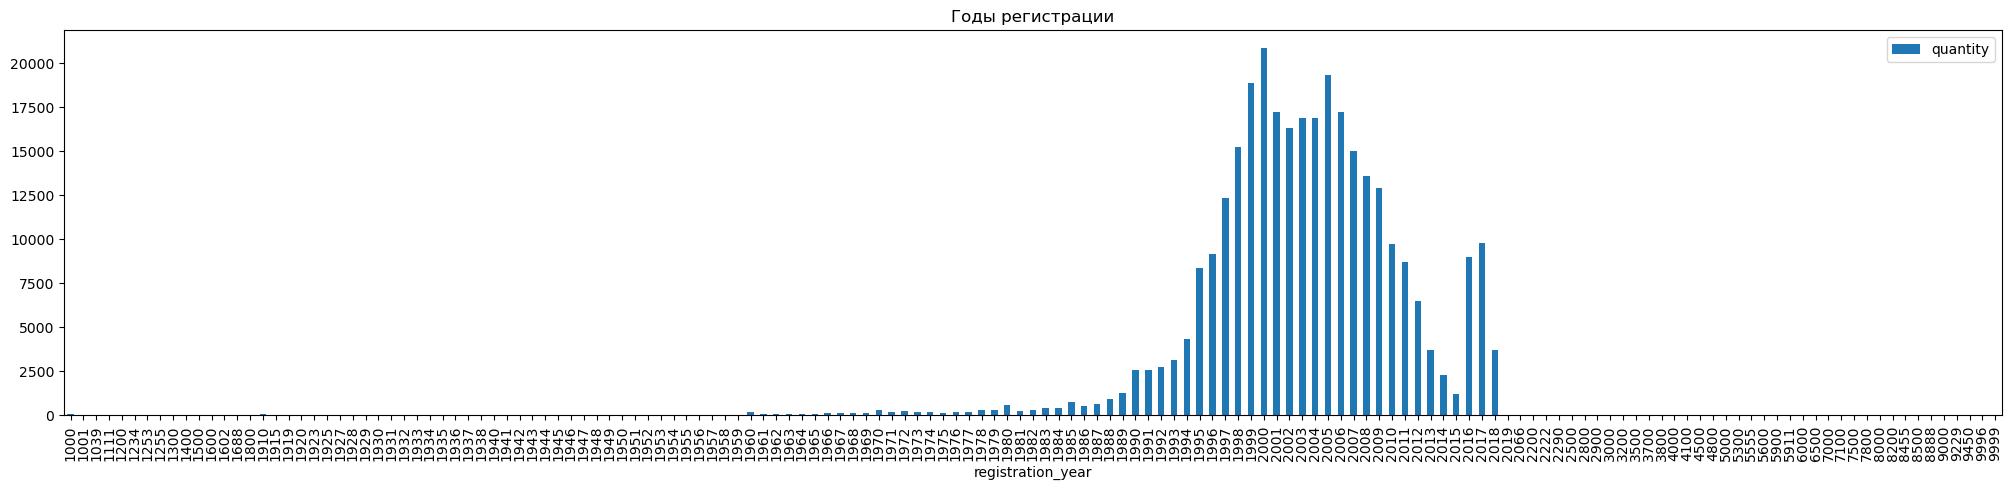

In [22]:
years.plot.bar(figsize = (25,5))
plt.title('Годы регистрации')
plt.show()

Из имеющихся данных, а также из полученного графика, видно что основные года, когда регистрировались машины приходятся на период с 1975 года по 2016, а далее идут даты с определенной аномалией. Поэтому оставим данные только в период с 1970 по 2016 гг.

In [24]:
data = data.query('1970 <= registration_year <= 2016')
print(len(data))                  

294467


Признак **power**

In [23]:
power = data.pivot_table(index='power', values='model', aggfunc='count')
power.columns = ['quantity']
power

,quantity
power,
0,35978
1,32
2,10
3,9
4,26
...,...
17932,1
19208,1
19211,1


Поскольку к настоящему времени самая максимальная мощность автомобиля составляет 2500 л.с, а самая маленькая 9 л.с, ограничим данные именно такими значениями мощности

In [24]:
data = data.query('9 <= power <= 2500')
print(len(data))                  

273050


Целевой признак **price**

In [25]:
data['price'].value_counts()

price
0        5883
1500     3841
500      3687
2500     3215
1200     3173
         ... 
3759        1
2351        1
2305        1
13362       1
10985       1
Name: count, Length: 3622, dtype: int64

Удалим из целевого признака все нулевые значения

In [26]:
data = data.query('price > 0')
len(data)

267167

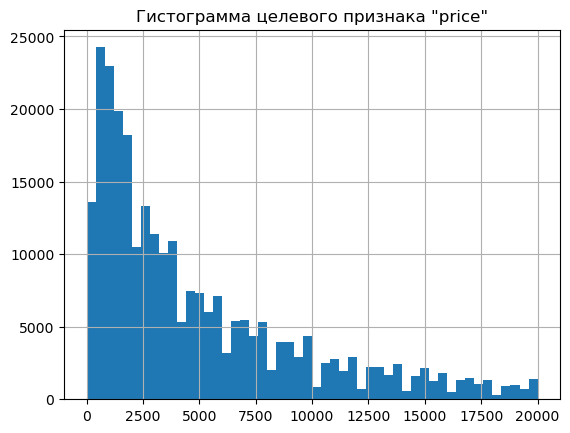

In [28]:
data['price'].hist(bins=50)
plt.title('Гистограмма целевого признака "price"')
plt.show()

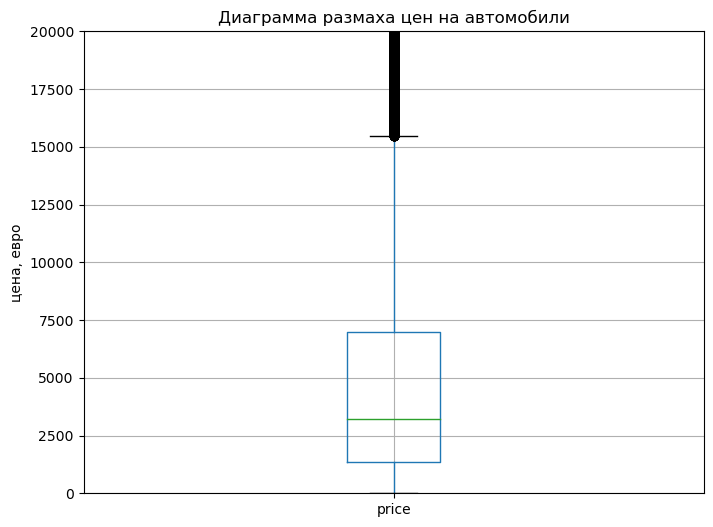

In [29]:
data.boxplot(column='price', figsize=(8, 6))
plt.title('Диаграмма размаха цен на автомобили')
plt.ylim(0, 20000)
plt.ylabel('цена, евро')
plt.show()

Так же для наглядности посмотрим квантили

In [30]:
data['price'].quantile([.05, 0.95])

0.05      400.0
0.95    15000.0
Name: price, dtype: float64

Посмотрим какую долю составляют строки, где цена лежит за пределами меньше 0,05 квантиля

In [31]:
1 - data.query('400 <= price').shape[0] / data.shape[0]

0.04467243334693283

Так как доля не большая, меньше 5%, оставим в целевом признаке только машины стоимостью от 400 евро

In [32]:
data = data.query('400 <= price')
len(data)

255232

In [33]:
check_data(data)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,1,190,unknown,125000,gasoline,audi,1
2,9800,suv,2004,0,163,grand,125000,gasoline,jeep,0
3,1500,small,2001,1,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,1,69,fabia,90000,gasoline,skoda,0
5,650,sedan,1995,1,102,3er,150000,petrol,bmw,1


'Размеры датафрейма: (255232, 10)'

'Количество пропусков:'

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

'Количество явных дубликатов'

6647

,price,registration_year,power,kilometer
count,255232.000000,255232.000000,255232.000000,255232.000000
mean,5108.636507,2003.769982,124.085036,127036.245455
std,4630.085584,30.488990,66.556565,37430.728855
min,400.000000,1000.000000,9.000000,5000.000000
25%,1500.000000,1999.000000,82.000000,125000.000000
50%,3499.000000,2004.000000,116.000000,150000.000000
75%,7300.000000,2008.000000,150.000000,150000.000000
max,20000.000000,9999.000000,2461.000000,150000.000000



<class 'pandas.core.frame.DataFrame'>
Index: 255232 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              255232 non-null  int64 
 1   vehicle_type       255232 non-null  object
 2   registration_year  255232 non-null  int64 
 3   gearbox            255232 non-null  object
 4   power              255232 non-null  int64 
 5   model              255232 non-null  object
 6   kilometer          255232 non-null  int64 
 7   fuel_type          255232 non-null  object
 8   brand              255232 non-null  object
 9   repaired           255232 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.4+ MB


None

После обработки пропусков в данных обнаружены еще явные дубликаты, так что их удалим тоже

In [34]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [35]:
check_data(data)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,1,190,unknown,125000,gasoline,audi,1
2,9800,suv,2004,0,163,grand,125000,gasoline,jeep,0
3,1500,small,2001,1,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,1,69,fabia,90000,gasoline,skoda,0
5,650,sedan,1995,1,102,3er,150000,petrol,bmw,1


'Размеры датафрейма: (248585, 10)'

'Количество пропусков:'

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

'Количество явных дубликатов'

0

,price,registration_year,power,kilometer
count,248585.000000,248585.000000,248585.000000,248585.000000
mean,5154.198592,2003.804872,124.504266,126688.436551
std,4648.055594,30.617568,66.942617,37638.371462
min,400.000000,1000.000000,9.000000,5000.000000
25%,1500.000000,2000.000000,83.000000,125000.000000
50%,3500.000000,2004.000000,116.000000,150000.000000
75%,7450.000000,2008.000000,150.000000,150000.000000
max,20000.000000,9999.000000,2461.000000,150000.000000



<class 'pandas.core.frame.DataFrame'>
Index: 248585 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              248585 non-null  int64 
 1   vehicle_type       248585 non-null  object
 2   registration_year  248585 non-null  int64 
 3   gearbox            248585 non-null  object
 4   power              248585 non-null  int64 
 5   model              248585 non-null  object
 6   kilometer          248585 non-null  int64 
 7   fuel_type          248585 non-null  object
 8   brand              248585 non-null  object
 9   repaired           248585 non-null  object
dtypes: int64(4), object(6)
memory usage: 20.9+ MB


None

### Вывод по разделу

На вход были получены данные размерностью (354369, 16). Данные довольно "сырые", поскольку в них обнаружено много пропусков, нулевых и аномально высоких значений. Поэтому была проведена предобработка данных, которая включала в себе заполнение пропусков логически возможными способами, удаление строк с аномально маленькими и большими значениями, исключение столбцов, не влияющих на целевой признак

В результате предобработки данных исходный датафрейм сократился на 30%, и сейчас размер данных составляет (248585, 10).
Однако датафрейм такой размерности является достаточным для обучения модели

## Обучение моделей

### Выделение признаков и разделение на выборки

In [36]:
features = data.drop('price', axis=1)
target = data['price']

In [37]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=12345)

In [38]:
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(186438, 9) (62147, 9) (186438,) (62147,)


### Кодирование категориальных признаков

Выбрано, анализировать такие модели как LinearRegression, CatBoostRegressor и LightGBMRegressor.

Категориальные признаки закодируем прямым кодированием, так как в данных отстутсвует какой-то прямой порядок в категориях, которые справделиво описать числами порядковыми числами.

In [41]:
features_ohe = pd.get_dummies(features, drop_first=True)
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=12345)

In [42]:
print(features_train_ohe.shape, features_test_ohe.shape, target_train_ohe.shape, target_test_ohe.shape)

(186438, 308) (62147, 308) (186438,) (62147,)


Из полученных размерностей выборок видим, что количество столбцов сильно, увеличилось, поэтому использовать метод ОНЕ оказалось не целесообразным. Закодируем признакими с помощью MEstimateEncoder.

In [43]:
numeric = ['vehicle_type','fuel_type','brand','model']

features_train_me = pd.DataFrame(encoder.fit_transform(features_train, target_train))
features_test_me = pd.DataFrame(encoder.transform(features_test, target_test))

In [44]:
features_train_me.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
304430,5268.571693,1997,4592.791497,90,1316.629357,125000,4459.667457,3886.430116,5419.046597
153281,3334.444770,2000,4592.791497,58,2640.718539,150000,3291.229460,3413.106471,5419.046597
275987,5268.571693,2002,4592.791497,83,1648.185368,150000,4459.667457,4920.806039,5419.046597
169184,3334.444770,2012,4592.791497,75,8072.506778,50000,4459.667457,5250.360928,5419.046597
136663,5373.327609,2006,4592.791497,109,3810.244877,150000,7009.253410,3886.430116,5419.046597


In [45]:
features_test_me.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
64106,3334.444770,1999,7212.009534,54,3824.649461,125000,4459.667457,3754.313350,5419.046597
190991,3334.444770,1995,7212.009534,60,2640.718539,125000,4459.667457,3413.106471,5419.046597
304325,7201.751576,1994,4592.791497,90,1316.629357,80000,4459.667457,3886.430116,5419.046597
275350,3416.287048,2016,4592.791497,58,4091.985007,125000,4459.667457,2873.949606,5419.046597
352449,3334.444770,1995,4592.791497,46,2640.718539,150000,4459.667457,3413.106471,5419.046597


In [46]:
target_train_me = target_train.copy()
target_test_me = target_test.copy()

### Обучение моделей

#### Модель LinearRegression

Так как в числовых признаках присутствует большой разброс в числовых значениях, стандартизируем признаки

In [47]:
pd.options.mode.chained_assignment = None
numeric_standart = ['registration_year', 'power', 'kilometer']

scaler = StandardScaler()
scaler.fit(features_train_me[numeric_standart])
features_train_me[numeric_standart] = scaler.transform(features_train_me[numeric_standart])
features_test_me[numeric_standart] = scaler.transform(features_test_me[numeric_standart])

In [48]:
features_train_me.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
304430,5268.571693,-0.237740,4592.791497,-0.508645,1316.629357,-0.045612,4459.667457,3886.430116,5419.046597
153281,3334.444770,-0.132138,4592.791497,-0.980195,2640.718539,0.619531,3291.229460,3413.106471,5419.046597
275987,5268.571693,-0.061736,4592.791497,-0.611797,1648.185368,0.619531,4459.667457,4920.806039,5419.046597
169184,3334.444770,0.290271,4592.791497,-0.729684,8072.506778,-2.041041,4459.667457,5250.360928,5419.046597
136663,5373.327609,0.079067,4592.791497,-0.228662,3810.244877,0.619531,7009.253410,3886.430116,5419.046597


На выборках c кодированием категориальных признаков

In [71]:
start = time()

model_lr_me = LinearRegression()
model_lr_me.fit(features_train_me, target_train_me)
predcition_lr_me = model_lr_me.predict(features_train_me)
rmse_lr_me = (mean_squared_error(target_train_me, predcition_lr_me)) ** 0.5
print('RMSE для модели линейной регрессии:', rmse_lr_me)

time_lr = time() - start
print(time_lr)

RMSE для модели линейной регрессии: 3167.318412592943
0.07035970687866211


С использованием кроссвалидации

Напишем функцию для расчета RMSE

In [52]:
def rmse_func(target, predict):
    return mean_squared_error(target, predict) ** 0.5

Добавим `rmse_func` с использованием `make_scorer`для использования этой функции при кросс-валидации и обучении модели, для того, чтобы данная функция возвращала нам значения RMSE

In [53]:
function = make_scorer(rmse_func)

In [72]:
start = time()

model_lr_val = LinearRegression()
rmse_lr_val_me = cross_val_score(model_lr_val, 
                                 features_train_me,
                                 target_train_me,
                                 scoring=function,
                                 cv=5)

print('RMSE для модели линейной регрессии с кросс-валидацией:', min(rmse_lr_val_me))

time_lr_cr_val = time() - start
print(time_lr_cr_val)

RMSE для модели линейной регрессии с кросс-валидацией: 3150.246251875895
0.3990299701690674


#### Модель CatBoostRegressor

In [74]:
start = time()

model_cbr = CatBoostRegressor() 
parameters = [{'learning_rate':[.1, .5, .8], 'random_state':[12345], 'verbose':[False]}]

gscv = GridSearchCV(model_cbr, parameters, scoring=function)
gscv.fit(features_train_me, target_train_me)

rmse_cbr = gscv.cv_results_['mean_test_score']

print('Наилучшие параметры модели CatBoostRegressor:', gscv.best_params_)
print()
print('RMSE для модели CatBoostRegressor:', min(rmse_cbr))

time_cat = time() - start
print(time_cat)

Наилучшие параметры модели CatBoostRegressor: {'learning_rate': 0.8, 'random_state': 12345, 'verbose': False}

RMSE для модели CatBoostRegressor: 1645.7907124044345
365.84239983558655


Для подсчета времени обучения и предсказания модели подставим наилучшие параметры, обучим заново и проверим значение RMSE

In [75]:
start = time()

model_cbr = CatBoostRegressor(learning_rate=0.8, random_state=12345, verbose=False)
model_cbr.fit(features_train_me, target_train_me)

time_cat_learn = time() - start
print(time_cat_learn)

27.45990538597107


In [76]:
start = time()

prediction_cbr = model_cbr.predict(features_train_me)

time_cat_predict = time() - start
print(time_cat_predict)

0.06244778633117676


In [77]:
rmse_cbr_me = (mean_squared_error(target_train_me, prediction_cbr)) ** 0.5
rmse_cbr_me

1372.6506001464898

#### Модель LightGBMRegressor

In [78]:
%%time

model_lgbm = LGBMRegressor() 
parameters_lgbm = [{'num_leaves':[25, 50, 100], 'random_state':[12345], 'learning_rate':[0.1, 0.5, 0.8]}]

lgbm = GridSearchCV(model_lgbm, parameters_lgbm, scoring=function)
lgbm.fit(features_train_me, target_train_me)

rmse_lgbm = lgbm.cv_results_['mean_test_score']

print('Наилучшие параметры модели LightGBMRegressor:', lgbm.best_params_)
print()
print('RMSE для модели LightGBMRegressor:', min(rmse_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 149150, number of used features: 9
[LightGBM] [Info] Start training from score 5155.693000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 149150, number of used features: 9
[LightGBM] [Info] Start training from score 5149.140932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 149150, number of used features: 9
[LightGBM] [Info] Start training from score 5149.140932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 149150, number of used features: 9
[LightGBM] [Info] Start training from score 5149.664412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 149150, number of used features: 9
[LightGBM] [Info] Start training from score 5149.664412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 149151, number of used features: 9
[LightGBM] [Info] Start training from score 5151.655141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

Для подсчета времени обучения и предсказания модели подставим наилучшие параметры, обучим заново и проверим значение RMSE на тестовой выборке

In [79]:
start = time()

model_lgbm = LGBMRegressor(num_leaves=25, learning_rate=0.1, random_state=12345)
model_lgbm.fit(features_train_me, target_train_me)

time_lgbm_learn = time() - start
print(time_lgbm_learn)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 186438, number of used features: 9
[LightGBM] [Info] Start training from score 5150.464095
1.4183316230773926


In [80]:
start = time()

prediction_lgbm = model_lgbm.predict(features_train_me)

time_lgbm_predict = time() - start
print(time_lgbm_predict)

0.5807082653045654


In [81]:
rmse_lgbm_me = (mean_squared_error(target_train_me, prediction_lgbm)) ** 0.5
rmse_lgbm_me

1713.2365748371428

## Анализ моделей

Создадим сводную таблицу с  показателями RMSE, временем обучения моделей и временем предсказанаия модели

In [82]:
index = ['Линейная регрессия с ОНЕ',
         'Линейная регрессия с кросс-валидацией',
        'CatBoostRegressor с ОНЕ',
        'LGBMRegressor c OHE']

df = {'RMSE' : [rmse_lr_me, min(rmse_lr_val_me), rmse_cbr_me, rmse_lgbm_me],
     'Время обучения модели, с' : [time_lr, time_lr_cr_val, time_cat_learn, time_lgbm_learn],
     'Время предсказания модели, с' : [time_lr, time_lr_cr_val, time_cat_predict, time_lgbm_predict]}

pivot_df = pd.DataFrame(data=df, index=index)

display(pivot_df)

,RMSE,"Время обучения модели, с","Время предсказания модели, с"
Линейная регрессия с ОНЕ,3167.318413,0.070360,0.070360
Линейная регрессия с кросс-валидацией,3150.246252,0.399030,0.399030
CatBoostRegressor с ОНЕ,1372.650600,27.459905,0.062448
LGBMRegressor c OHE,1713.236575,1.418332,0.580708


Из полученной таблицы видно, что наилучшей моделью по показателям RMSE, времени обучения и предсказания является модель `CatBoostRegressor`. Проверим эту модель на тестовой выборке

In [66]:
%%time

model_cbr_test = CatBoostRegressor(learning_rate=0.8, random_state=12345, verbose=False)
model_cbr_test.fit(features_test_me, target_test_me)

CPU times: total: 29.6 s
Wall time: 15.4 s


In [67]:
%%time

prediction_cbr_test = model_cbr_test.predict(features_test_me)

CPU times: total: 78.1 ms
Wall time: 26.9 ms


In [68]:
rsme_cbr_me_test = mean_squared_error(target_test_me,prediction_cbr_test) ** .5
print('RMSE для модели CatBoostRegressor на тестовой выборке:', rsme_cbr_me_test)

RMSE для модели CatBoostRegressor на тестовой выборке: 1232.77410253304


## Итоговый вывод

Нашей задачей было построение оптимальной модели, которая могла бы определять рыночную стоимость своего автомобиля, для сервиса "Не бит, не крашен". Оптимальность модели оценивалась по значению метрики RMSE, а также по времени, затрачиваемому на обучение модели и на предсказания.

На вход был получен датафрейм размерностью (354369, 16). Данные были довольно "сырые", поэтому перед подбором оптимальной модели провели предварительную обработку данных:

- привели наименования столбцов к змеиному регистру;
- заполнили пропуски логичеси возможными способами;
- избавились от аномальных значений;
- удалили столбцы не влияющие на целевой признак.

Далее подготовили данные для обучения модели. Так как в данных много категориальных признаков, к данным применили метод OHE. Разделили данные на тренировочные и тестовые выборки.

При анализе значений RMSE и времени на обучение и предсказание моделй получили следующее :

- Для модели LinearRegression значение RMSE равно 3150,24, что не удовлетворяет требованиям заказчика по минимально пороговому значению RMSE в 2500, но при этом данная модель тратит малое количество времени на обучение и предсказание;
- Для модели CatBoostRegressor значение RMSE равно 1372,65, что полностью удовлетворяет требованиям заказчика, однако данная модель по сравнению со всеми анализируемыми затратила наибольшее количество времени на обучение и предсказание;
- Для модели LGBMRegressor значение RMSE равно 1713,23, что так же полностью удовлетворяет пороговому значению RMSE, установленому Заказчиком

Проверку на тестовой выборке проводили для модели CatBoostRegressor, так как она показала наилучшие результаты при оценке качества модели. Однако если Заказчику требоуется модель, которая тратит меньшее количество времени на обучение и предсказание, то рекомендуется рассмотреть модель LGBMRegressor.

